In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read(name):
    buff = None
    with open(name, 'r') as f:
        buff = f.read()

    return json.loads(buff)

In [ ]:
text_res = read('/content/drive/MyDrive/Colab_Notebooks/diploma/model/model2_text.json')

In [ ]:
text_res = read('model2_text.json')

In [ ]:
text_res = read('model2_text1.json')

In [ ]:
def set_axis(ax):
    ax.set_axisbelow(True)
    ax.grid()
    ax.legend()

## Results

Plots for training data

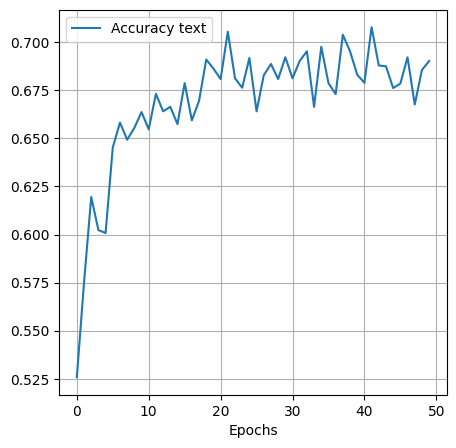

In [ ]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

ax1.plot(text_res['accuracy'], label='Accuracy text')
ax1.set_xlabel('Epochs')
set_axis(ax1)

In [ ]:
!pip install -q tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 51.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [ ]:
preprocess_url = hub.load('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1')
encoder_url = hub.load('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3')

In [ ]:
bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_news')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.load_weights("/content/drive/MyDrive/Colab_Notebooks/diploma/model/model_71.h5")

In [ ]:
reviews = [
    "Russian Foreign Minister Lavrov: The West has long been provoking Ukraine into anti-Russian actions, we cannot rule out that Kyiv will break loose into military adventures.", 
    "USA has surrounded Russia with military bases from all sides and is stirring up military hysteria near the borders of the Russian Federation -  Russian Foreign Minister Lavrov",
    "Vladimir Putin: Russia is concerned about unplanned exercises near its borders.",
    "YouTube has blocked Russian propaganda channels in Ukraine   As of today, we do not have access to Channel One, Russia 24 and Russia 1, TASS, RIA News, RBC, Zvezda TV Channel, and a number of other channels.  ",
    "Ministry of Health of Ukraine: since the beginning of the military invasion of the Russian Federation in Ukraine, 2040 civilians have been injured.  Among them - 45 children.  352 people were killed. Among them - 16 children.  "]
model.predict(reviews)

1/1 [==============================] - 3s 3s/step


array([[0.30982783],
       [0.23552527],
       [0.23198186],
       [0.57479095],
       [0.62977856]], dtype=float32)